# Steps:
* Data Collection.
* Data Exploration.
* Handle Categorical Data (impute and encode).
* Feature Engineering (create new features, drop unnecessary ones).
* Handle Skewness in numerical data (log transformation, Box-Cox, or Yeo-Johnson transformation).
* Scale Numerical Data.
* Data Splitting (train/test split).
* Model Selection and Training.
* Model Evaluation.
* Model Tuning and Optimization (if needed).
* Model Deployment (if required).

# Phase 1: Problem Understanding

In [1]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("prasad22/weather-data")

print("Path to dataset files:", path)

100%|██████████| 42.6M/42.6M [00:03<00:00, 14.9MB/s]

Extracting files...


Path to dataset files: /root/.cache/kagglehub/datasets/prasad22/weather-data/versions/1


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [10]:

file_path = "/root/.cache/kagglehub/datasets/prasad22/weather-data/versions/1/weather_data.csv"
df = pd.read_csv(file_path)
df.head()

,Location,Date_Time,Temperature_C,Humidity_pct,Precipitation_mm,Wind_Speed_kmh
0,San Diego,2024-01-14 21:12:46,10.683001,41.195754,4.020119,8.233540
1,San Diego,2024-05-17 15:22:10,8.734140,58.319107,9.111623,27.715161
2,San Diego,2024-05-11 09:30:59,11.632436,38.820175,4.607511,28.732951
3,Philadelphia,2024-02-26 17:32:39,-8.628976,54.074474,3.183720,26.367303
4,San Antonio,2024-04-29 13:23:51,39.808213,72.899908,9.598282,29.898622


In [11]:
# exproling the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 6 columns):
 #   Column            Non-Null Count    Dtype  
---  ------            --------------    -----  
 0   Location          1000000 non-null  object 
 1   Date_Time         1000000 non-null  object 
 2   Temperature_C     1000000 non-null  float64
 3   Humidity_pct      1000000 non-null  float64
 4   Precipitation_mm  1000000 non-null  float64
 5   Wind_Speed_kmh    1000000 non-null  float64
dtypes: float64(4), object(2)
memory usage: 45.8+ MB


In [13]:
df.describe()

,Temperature_C,Humidity_pct,Precipitation_mm,Wind_Speed_kmh
count,1000000.000000,1000000.000000,1000000.000000,1000000.000000
mean,14.779705,60.021830,5.109639,14.997598
std,14.482558,17.324022,2.947997,8.663556
min,-19.969311,30.000009,0.000009,0.000051
25%,2.269631,45.008500,2.580694,7.490101
50%,14.778002,60.018708,5.109917,14.993777
75%,27.270489,75.043818,7.613750,22.514110
max,39.999801,89.999977,14.971583,29.999973


In [14]:
df.isnull().sum()

,0
Location,0
Date_Time,0
Temperature_C,0
Humidity_pct,0
Precipitation_mm,0
Wind_Speed_kmh,0


In [16]:
df.duplicated().sum()

0

In [18]:
df["Date_Time"].value_counts()

,count
Date_Time,
2024-04-25 08:19:00,4
2024-01-26 09:38:44,4
2024-05-15 05:58:53,4
2024-05-12 19:08:24,4
2024-02-23 03:44:53,4
...,...
2024-01-31 19:04:01,1
2024-02-10 07:25:34,1
2024-01-27 11:47:33,1


In [19]:
df['Date_Time'] = pd.to_datetime(df['Date_Time'])
df.head()


,Location,Date_Time,Temperature_C,Humidity_pct,Precipitation_mm,Wind_Speed_kmh
0,San Diego,2024-01-14 21:12:46,10.683001,41.195754,4.020119,8.233540
1,San Diego,2024-05-17 15:22:10,8.734140,58.319107,9.111623,27.715161
2,San Diego,2024-05-11 09:30:59,11.632436,38.820175,4.607511,28.732951
3,Philadelphia,2024-02-26 17:32:39,-8.628976,54.074474,3.183720,26.367303
4,San Antonio,2024-04-29 13:23:51,39.808213,72.899908,9.598282,29.898622


In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 6 columns):
 #   Column            Non-Null Count    Dtype         
---  ------            --------------    -----         
 0   Location          1000000 non-null  object        
 1   Date_Time         1000000 non-null  datetime64[ns]
 2   Temperature_C     1000000 non-null  float64       
 3   Humidity_pct      1000000 non-null  float64       
 4   Precipitation_mm  1000000 non-null  float64       
 5   Wind_Speed_kmh    1000000 non-null  float64       
dtypes: datetime64[ns](1), float64(4), object(1)
memory usage: 45.8+ MB


In [23]:
# Daily mean temperature
daily_temperature = df.resample('D', on='Date_Time')['Temperature_C'].mean()

# Monthly total precipitation
monthly_precipitation = df.resample('M', on='Date_Time')['Precipitation_mm'].sum()


print(daily_temperature.head())
print(monthly_precipitation.head())




<ipython-input-23-b8a3ac0f0037>:5: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_precipitation = df.resample('M', on='Date_Time')['Precipitation_mm'].sum()


Date_Time
2024-01-01    14.434501
2024-01-02    14.055581
2024-01-03    14.516489
2024-01-04    14.577469
2024-01-05    14.622693
Freq: D, Name: Temperature_C, dtype: float64
Date_Time
2024-01-31    1.174628e+06
2024-02-29    1.093498e+06
2024-03-31    1.114472e+06
2024-04-30    1.083924e+06
2024-05-31    6.431172e+05
Freq: ME, Name: Precipitation_mm, dtype: float64


In [24]:
# Data for January 2024
january_data = df[(df['Date_Time'] >= '2024-01-01') & (df['Date_Time'] < '2024-02-01')]
print(january_data.head())


     Location           Date_Time  Temperature_C  Humidity_pct  \
0   San Diego 2024-01-14 21:12:46      10.683001     41.195754   
5   San Diego 2024-01-21 08:54:56      27.341055     49.023236   
6    San Jose 2024-01-13 02:10:54       1.881883     65.742325   
7    New York 2024-01-25 19:04:34      -6.894766     30.804894   
17    Chicago 2024-01-06 02:59:46      26.786811     31.513614   

    Precipitation_mm  Wind_Speed_kmh  
0           4.020119        8.233540  
5           9.166543       27.473896  
6           0.221709        1.073112  
7           8.027624       16.848337  
17          0.496024       22.980095  


In [25]:
# Mean temperature and humidity by location
location_stats = df.groupby('Location')[['Temperature_C', 'Humidity_pct']].mean()
print(location_stats)


              Temperature_C  Humidity_pct
Location                                 
Chicago           15.009208     60.088798
Dallas            15.009097     59.959900
Houston           14.942985     59.967598
Los Angeles       15.081063     60.072151
New York          15.013389     60.044688
Philadelphia      15.035892     60.044902
Phoenix           12.792479     60.048643
San Antonio       15.027761     59.932798
San Diego         14.933539     60.072074
San Jose          14.956108     59.986630


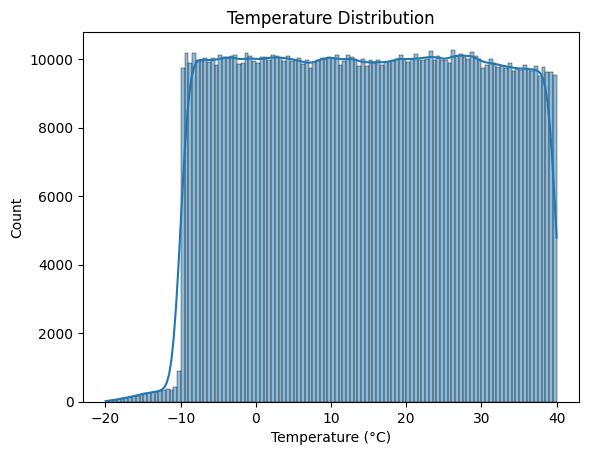

In [28]:
 # Ploting distribution of temperature
sns.histplot(df['Temperature_C'], kde=True)
plt.title('Temperature Distribution')
plt.xlabel('Temperature (°C)')
plt.show()


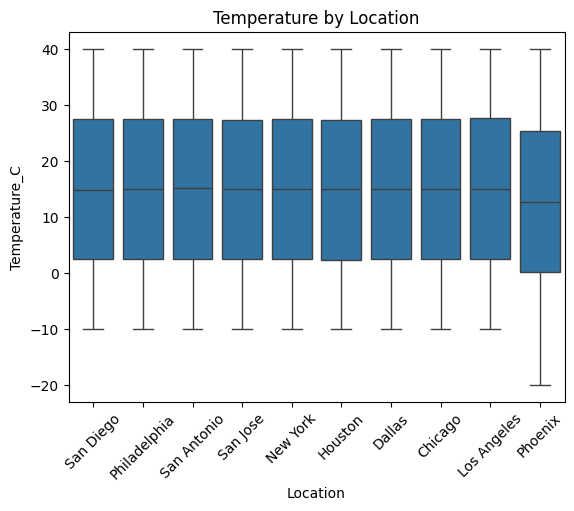

In [29]:
# Comparing temperature across locations
sns.boxplot(x='Location', y='Temperature_C', data=df)
plt.title('Temperature by Location')
plt.xticks(rotation=45)
plt.show()


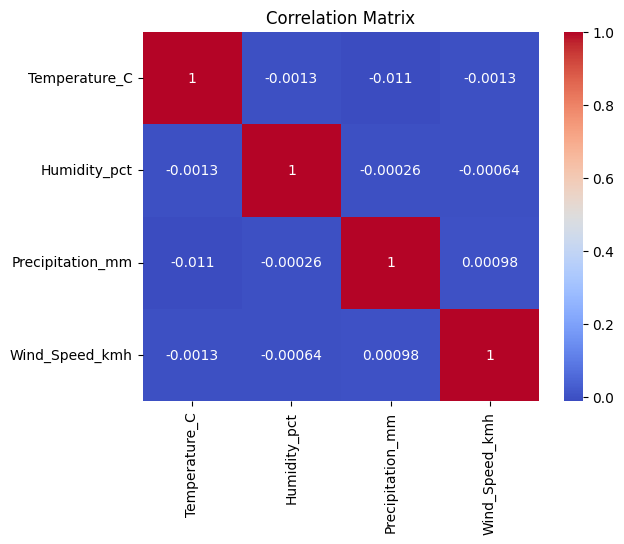

In [30]:
# Compute correlation matrix
correlation_matrix = df[['Temperature_C', 'Humidity_pct', 'Precipitation_mm', 'Wind_Speed_kmh']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


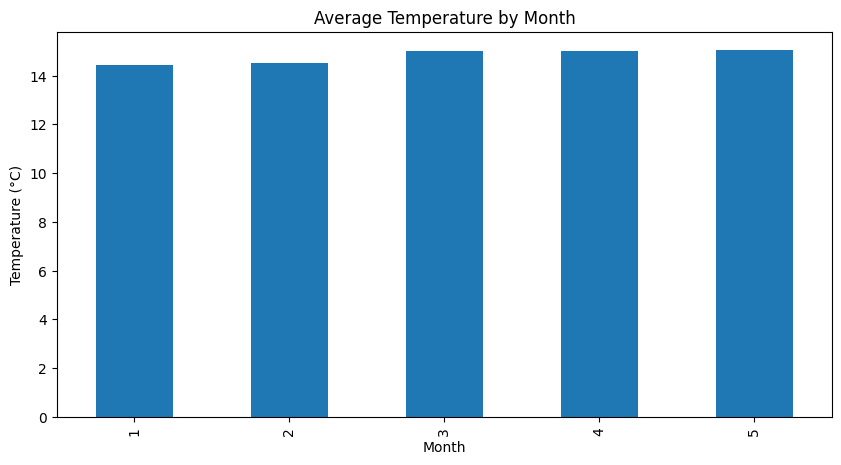

In [31]:
# Extracting month for seasonal analysis
df['Month'] = df['Date_Time'].dt.month

# Average temperature per month
seasonal_trend = df.groupby('Month')['Temperature_C'].mean()
seasonal_trend.plot(kind='bar', title='Average Temperature by Month', figsize=(10, 5))
plt.xlabel('Month')
plt.ylabel('Temperature (°C)')
plt.show()


In [32]:
# Saving proccesed data to a new CSV file
df.to_csv('processed_weather_data.csv', index=False)
